In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
df = pd.read_csv('../data/raw/tuberculosis_xray_dataset.csv')

In [4]:
df.head()

,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,69,Male,Yes,1,2,3,2.37,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,PID000002,32,Female,Yes,3,0,9,6.09,Moderate,No,Medium,No,Current,Yes,Normal
2,PID000003,89,Male,No,7,0,3,2.86,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,PID000004,78,Female,Yes,2,0,6,4.57,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,PID000005,38,Male,No,7,2,5,13.86,High,Yes,Low,No,Never,Yes,Tuberculosis


## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  object 
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Chest_Pain           20000 non-null  object 
 4   Cough_Severity       20000 non-null  int64  
 5   Breathlessness       20000 non-null  int64  
 6   Fatigue              20000 non-null  int64  
 7   Weight_Loss          20000 non-null  float64
 8   Fever                20000 non-null  object 
 9   Night_Sweats         20000 non-null  object 
 10  Sputum_Production    20000 non-null  object 
 11  Blood_in_Sputum      20000 non-null  object 
 12  Smoking_History      20000 non-null  object 
 13  Previous_TB_History  20000 non-null  object 
 14  Class                20000 non-null  object 
dtypes: float64(1), int64(4), object(10)


In [6]:
df.describe()

,Age,Cough_Severity,Breathlessness,Fatigue,Weight_Loss
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,53.467450,4.491350,2.003450,4.508450,7.455281
std,20.773984,2.864723,1.417123,2.881552,4.339864
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,2.000000,1.000000,2.000000,3.640000
50%,53.000000,4.000000,2.000000,5.000000,7.490000
75%,71.000000,7.000000,3.000000,7.000000,11.200000
max,89.000000,9.000000,4.000000,9.000000,15.000000


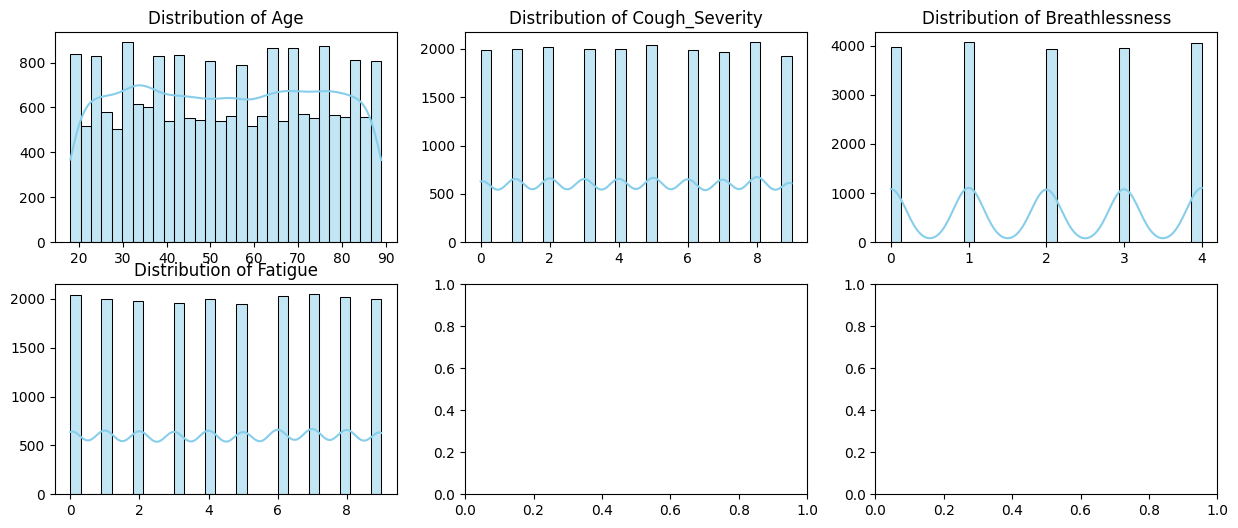

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.select_dtypes(include='number').columns[:-1], axes)):
    sns.histplot(df.select_dtypes(include='number')[col], ax=ax, kde=True, color='skyblue', bins=30)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

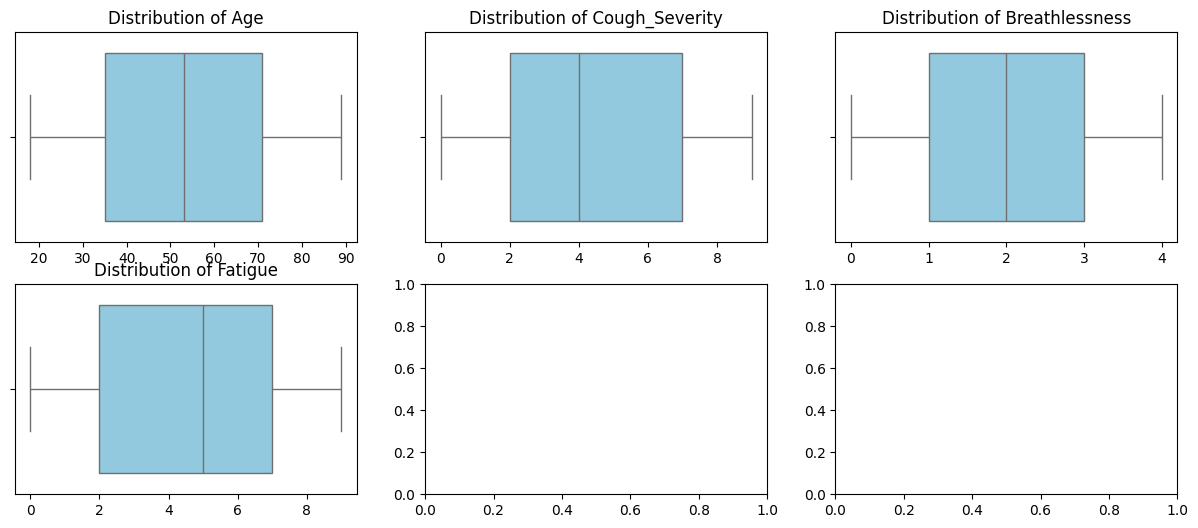

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.select_dtypes(include='number').columns[:-1], axes)):
    sns.boxplot(df.select_dtypes(include='number')[col], ax=ax, color='skyblue', orient='h')
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

C:\Users\jayaw\AppData\Local\Temp\ipykernel_6756\991270672.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\jayaw\AppData\Local\Temp\ipykernel_6756\991270672.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\jayaw\AppData\Local\Temp\ipykernel_6756\991270672.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\jayaw\AppData\Local\Temp\ipykernel_6756\991270672.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


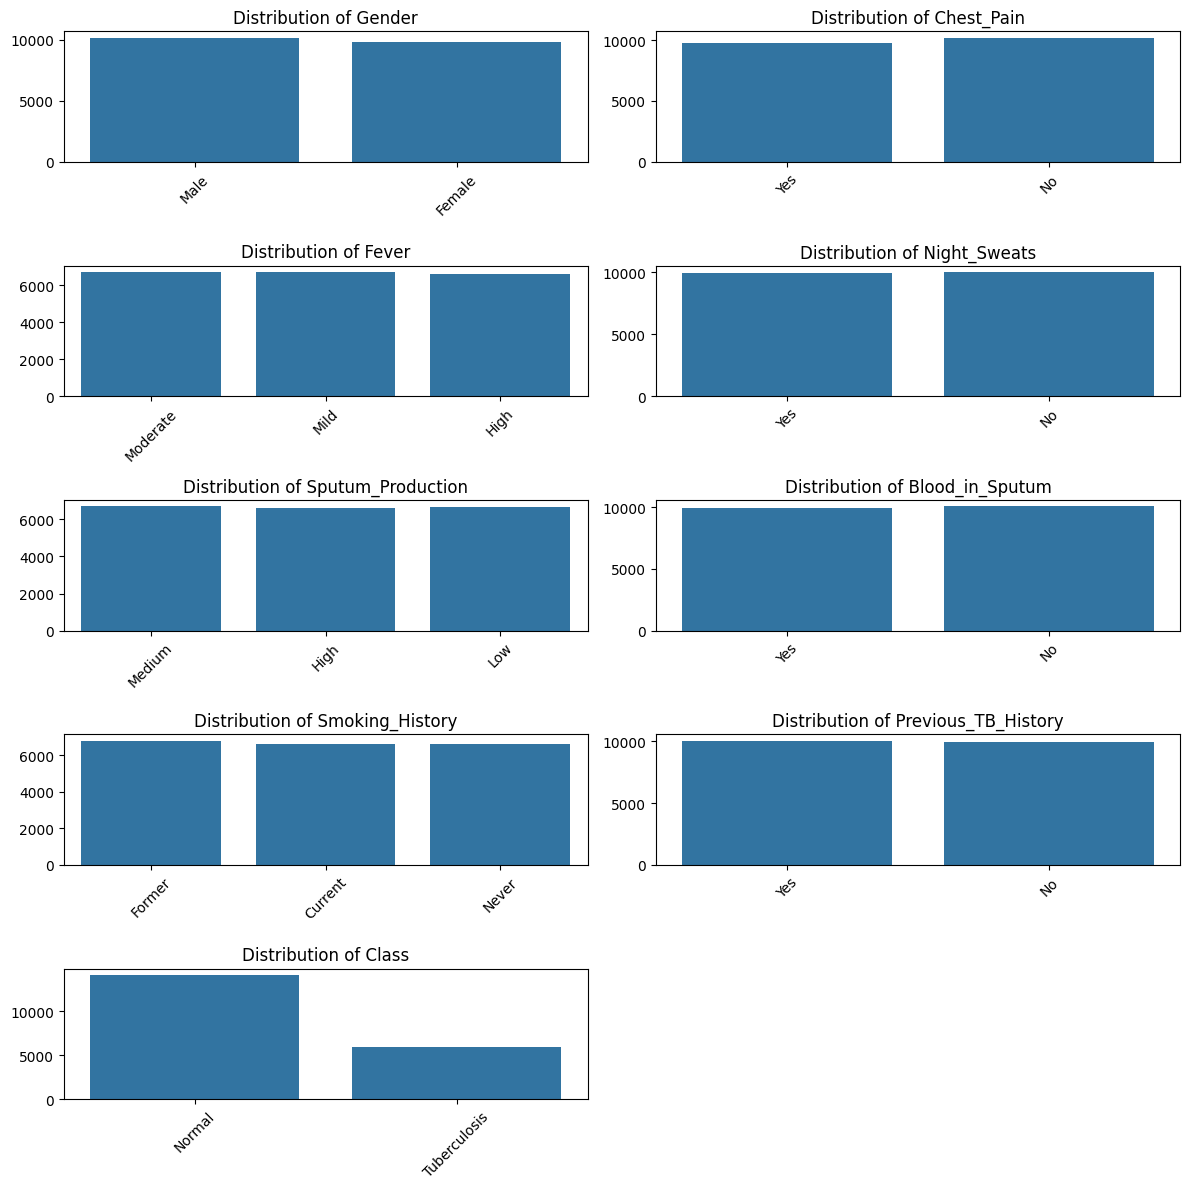

In [21]:
fig, axes = plt.subplots(5, 2, figsize=(12, 12))  # 2x2 grid
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Get categorical columns
cat_cols = df.select_dtypes(include='object').columns[1:len(axes)]  # Ensure we don't exceed subplot count

for col, ax in zip(cat_cols, axes):
    sns.countplot(data=df, x=col, ax=ax)  # Assign ax
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('')

# Hide unused subplots if df has fewer than 4 categorical columns
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()